In [2]:
# Goal 1
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize PySpark session
spark = SparkSession.builder.appName("CustomerDemographics").getOrCreate()

# Load dataset into PySpark
data = spark.read.csv("customer_data.csv", header=True, inferSchema=True)

# Group by demographics (age, gender, region) and count
demographics = data.groupBy("age", "gender", "region").count().orderBy("count", ascending=False)
demographics.show()


+---+------+------+-----+
|age|gender|region|count|
+---+------+------+-----+
| 30|Female|  East| 1368|
| 30|Female|  West| 1358|
| 29|Female|  East| 1344|
| 31|Female|  East| 1337|
| 30|  Male|  East| 1322|
| 29|Female|  West| 1312|
| 30|  Male|  West| 1304|
| 29|  Male|  East| 1303|
| 28|Female|  West| 1288|
| 31|  Male|  West| 1285|
| 29|  Male|  West| 1278|
| 31|  Male|  East| 1270|
| 28|  Male|  East| 1259|
| 32|Female|  West| 1249|
| 28|Female|  East| 1232|
| 32|  Male|  East| 1216|
| 31|Female|  West| 1214|
| 28|  Male|  West| 1207|
| 32|Female|  East| 1198|
| 32|  Male|  West| 1158|
+---+------+------+-----+
only showing top 20 rows



Matplotlib is building the font cache; this may take a moment.


<Figure size 1000x600 with 0 Axes>

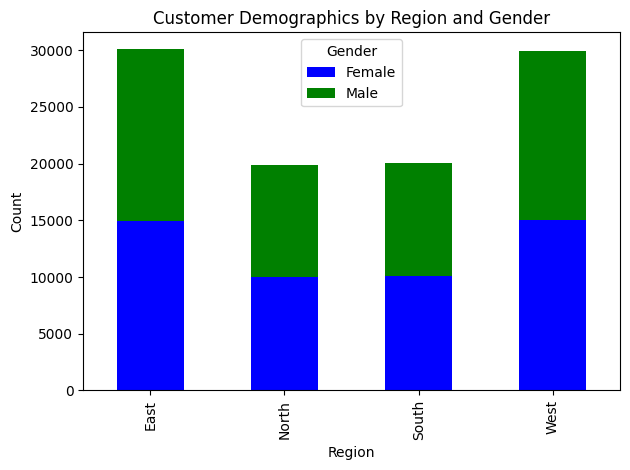

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize PySpark session
spark = SparkSession.builder.appName("CustomerDemographics").getOrCreate()

# Load dataset into PySpark
data = spark.read.csv("customer_data.csv", header=True, inferSchema=True)

# Group by demographics (age, gender, region) and count
demographics = data.groupBy("age", "gender", "region").count().orderBy("count", ascending=False)

# Convert to Pandas DataFrame for plotting
demographics_pandas = demographics.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
# Example: Bar plot showing counts by demographics
bar_plot = demographics_pandas.pivot_table(index='region', columns='gender', values='count', aggfunc='sum')
bar_plot.plot(kind='bar', stacked=True, color=['blue', 'green'])
plt.title('Customer Demographics by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [3]:
# Goal 2
# Analyze purchase frequency and total spending by product category
purchase_patterns = data.groupBy("purchase_frequency", "product_category").sum("purchase_amount").orderBy("sum(purchase_amount)", ascending=False)
purchase_patterns.show()


+------------------+----------------+--------------------+
|purchase_frequency|product_category|sum(purchase_amount)|
+------------------+----------------+--------------------+
|              rare|     Electronics|           145213724|
|              rare|        Clothing|            96214280|
|        occasional|     Electronics|            87035721|
|              rare|            Food|            71876737|
|              rare|           Books|            71613417|
|        occasional|        Clothing|            57479018|
|          frequent|     Electronics|            57457858|
|              rare|          Health|            48160453|
|        occasional|           Books|            43227193|
|        occasional|            Food|            42882296|
|          frequent|        Clothing|            38892628|
|        occasional|          Health|            29265344|
|          frequent|            Food|            28569012|
|          frequent|           Books|            2833395

<Figure size 1200x800 with 0 Axes>

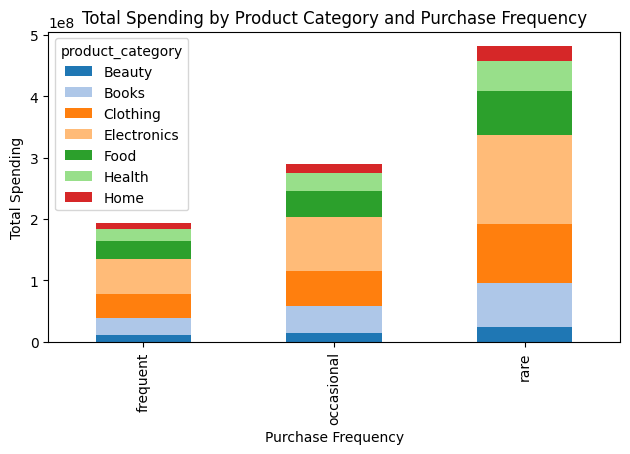

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize PySpark session
spark = SparkSession.builder.appName("CustomerDemographics").getOrCreate()

# Load dataset into PySpark
data = spark.read.csv("customer_data.csv", header=True, inferSchema=True)

# Analyze purchase frequency and total spending by product category
purchase_patterns = data.groupBy("purchase_frequency", "product_category").sum("purchase_amount").orderBy("sum(purchase_amount)", ascending=False)

# Convert to Pandas DataFrame for plotting
purchase_patterns_pandas = purchase_patterns.toPandas()

# Plotting
plt.figure(figsize=(12, 8))
# Example: Bar plot showing total spending per product category by purchase frequency
bar_plot = purchase_patterns_pandas.pivot(index='purchase_frequency', columns='product_category', values='sum(purchase_amount)')
bar_plot.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)
plt.title('Total Spending by Product Category and Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()


In [4]:
# Goal 3
# Analyze satisfaction scores by loyalty status and promotion usage
satisfaction_analysis = data.groupBy("loyalty_status", "promotion_usage").avg("satisfaction_score").orderBy("avg(satisfaction_score)", ascending=False)
satisfaction_analysis.show()


+--------------+---------------+-----------------------+
|loyalty_status|promotion_usage|avg(satisfaction_score)|
+--------------+---------------+-----------------------+
|          Gold|              0|      5.018270752409725|
|        Silver|              1|       5.01749723145072|
|        Silver|              0|      5.008837298175218|
|       Regular|              0|      5.008255025573926|
|       Regular|              1|      5.008064961608573|
|          Gold|              1|      5.000678656260604|
+--------------+---------------+-----------------------+



<Figure size 1000x600 with 0 Axes>

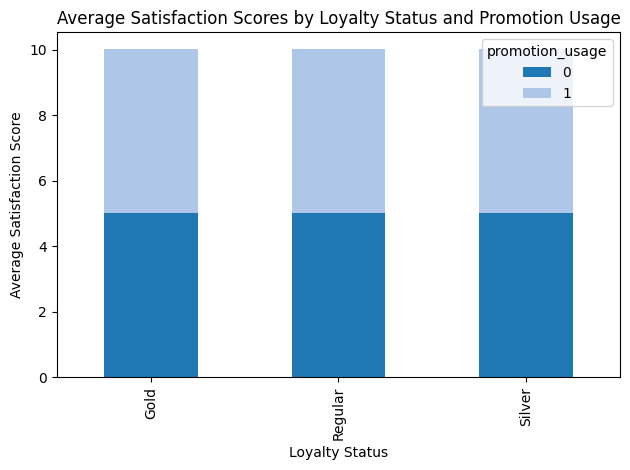

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize PySpark session
spark = SparkSession.builder.appName("CustomerDemographics").getOrCreate()

# Load dataset into PySpark
data = spark.read.csv("customer_data.csv", header=True, inferSchema=True)

# Analyze satisfaction scores by loyalty status and promotion usage
satisfaction_analysis = data.groupBy("loyalty_status", "promotion_usage").avg("satisfaction_score").orderBy("avg(satisfaction_score)", ascending=False)

# Convert to Pandas DataFrame for plotting
satisfaction_analysis_pandas = satisfaction_analysis.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
# Example: Bar plot showing average satisfaction scores by loyalty status and promotion usage
bar_plot = satisfaction_analysis_pandas.pivot(index='loyalty_status', columns='promotion_usage', values='avg(satisfaction_score)')
bar_plot.plot(kind='bar', stacked=True, color=plt.cm.tab20.colors)
plt.title('Average Satisfaction Scores by Loyalty Status and Promotion Usage')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Satisfaction Score')
plt.tight_layout()
plt.show()


In [5]:
# Goal 4
# Compare purchase amounts for customers who used promotions vs those who didn't
promotion_impact = data.groupBy("promotion_usage").avg("purchase_amount").orderBy("avg(purchase_amount)", ascending=False)
promotion_impact.show()


+---------------+--------------------+
|promotion_usage|avg(purchase_amount)|
+---------------+--------------------+
|              1|   9643.251761968086|
|              0|   9631.150901029749|
+---------------+--------------------+



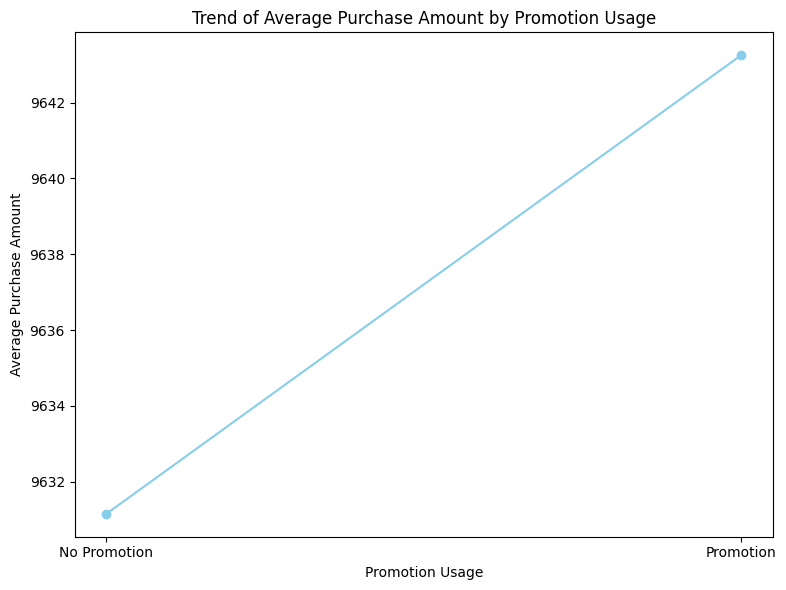

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize PySpark session
spark = SparkSession.builder.appName("CustomerDemographics").getOrCreate()

# Load dataset into PySpark
data = spark.read.csv("customer_data.csv", header=True, inferSchema=True)

# Compare purchase amounts for customers who used promotions vs those who didn't
promotion_impact = data.groupBy("promotion_usage").avg("purchase_amount").orderBy("avg(purchase_amount)", ascending=False)

# Convert to Pandas DataFrame for plotting
promotion_impact_pandas = promotion_impact.toPandas()

# Plotting
plt.figure(figsize=(8, 6))
# Line plot showing trend of average purchase amounts for customers based on promotion usage
promotion_impact_pandas.set_index('promotion_usage')['avg(purchase_amount)'].plot(kind='line', marker='o', color=['skyblue', 'coral'])
plt.title('Trend of Average Purchase Amount by Promotion Usage')
plt.xlabel('Promotion Usage')
plt.ylabel('Average Purchase Amount')
plt.xticks([0, 1], ['No Promotion', 'Promotion']) # Label the x-axis
plt.tight_layout()
plt.show()


In [6]:
# Goal 5
# Identify top regions by total purchase amount and satisfaction scores
actionable_insights = data.groupBy("region").agg(
    {"purchase_amount": "sum", "satisfaction_score": "avg"}
).orderBy("sum(purchase_amount)", ascending=False)
actionable_insights.show()


+------+-----------------------+--------------------+
|region|avg(satisfaction_score)|sum(purchase_amount)|
+------+-----------------------+--------------------+
|  East|      5.005087450954313|           289173865|
|  West|       5.00975446801403|           287951095|
| South|      5.012354904598216|           193680103|
| North|      5.013655989557185|           192674021|
+------+-----------------------+--------------------+



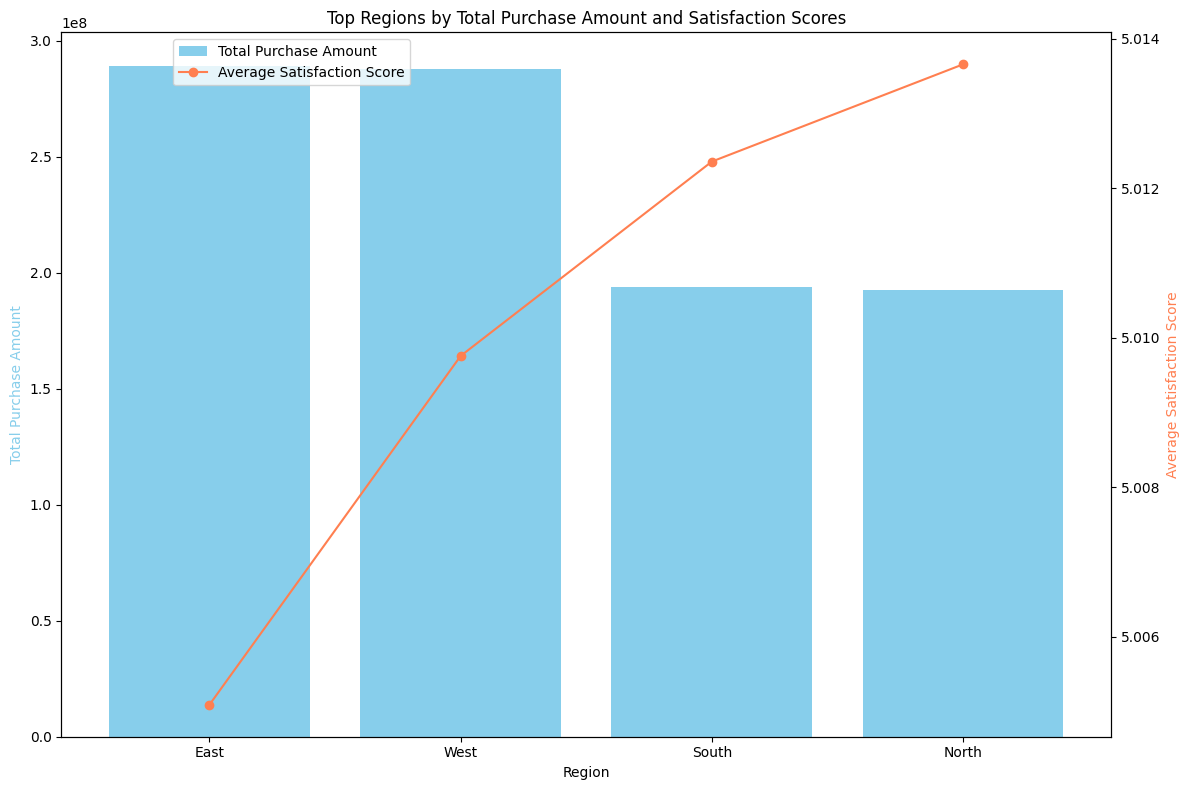

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize PySpark session
spark = SparkSession.builder.appName("CustomerDemographics").getOrCreate()

# Load dataset into PySpark
data = spark.read.csv("customer_data.csv", header=True, inferSchema=True)

# Identify top regions by total purchase amount and satisfaction scores
actionable_insights = data.groupBy("region").agg(
    {"purchase_amount": "sum", "satisfaction_score": "avg"}
).orderBy("sum(purchase_amount)", ascending=False)

# Convert to Pandas DataFrame for plotting
actionable_insights_pandas = actionable_insights.toPandas()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for total purchase amount
ax1.bar(actionable_insights_pandas['region'], actionable_insights_pandas['sum(purchase_amount)'], color='skyblue', label='Total Purchase Amount')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Purchase Amount', color='skyblue')

# Create a secondary y-axis for average satisfaction score
ax2 = ax1.twinx()
ax2.plot(actionable_insights_pandas['region'], actionable_insights_pandas['avg(satisfaction_score)'], color='coral', marker='o', label='Average Satisfaction Score')
ax2.set_ylabel('Average Satisfaction Score', color='coral')

plt.title('Top Regions by Total Purchase Amount and Satisfaction Scores')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1), bbox_transform=ax1.transAxes)
plt.show()
